In [27]:
import numpy as np 
import pandas as pd

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


## Load and prepare data

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) from United Nation's website.

In [28]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [29]:
df_can.head()

Type    Coverage          OdName  AREA  ...  2010  2011  2012  2013
0  Immigrants  Foreigners     Afghanistan   935  ...  1758  2203  2635  2004
1  Immigrants  Foreigners         Albania   908  ...   561   539   620   603
2  Immigrants  Foreigners         Algeria   903  ...  4752  4325  3774  4331
3  Immigrants  Foreigners  American Samoa   909  ...     0     0     0     0
4  Immigrants  Foreigners         Andorra   908  ...     0     0     1     1

[5 rows x 43 columns]

In [30]:
# 1. Clean up the dataset to remove columns that are not informative.
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [31]:
# 2. Rename columns and set type as string for them
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

df_can.columns = list(map(str, df_can.columns))
print('All columns are strings:', all(isinstance(column, str) for column in df_can.columns))

All columns are strings: True


In [32]:
# 3. Set the 'Country' column as index - useful for quickly looking up countries using .loc method.
df_can.set_index('Country', inplace=True)

In [33]:
# 4. Add total column.
df_can['Total'] = df_can.sum(axis=1)

In [34]:
# 5. Create list of years
years = list(map(str, range(1980, 2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [35]:
# 6. Dataframe is ready
print('Shape:', df_can.shape)
df_can.head()

Shape: (195, 38)


Continent           Region  ...  2013  Total
Country                                    ...             
Afghanistan         Asia    Southern Asia  ...  2004  58639
Albania           Europe  Southern Europe  ...   603  15699
Algeria           Africa  Northern Africa  ...  4331  69439
American Samoa   Oceania        Polynesia  ...     0      6
Andorra           Europe  Southern Europe  ...     1     15

[5 rows x 38 columns]

## Area Plot
An area plot also known as an area chart or graph is a type of plot that depicts accumulated totals
using numbers or percentages over time

In [36]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

df_top5 = df_top5[years].transpose() 

df_top5.head()

Country  India  China  ...  Philippines  Pakistan
1980      8880   5123  ...         6051       978
1981      8670   6682  ...         5921       972
1982      8147   3308  ...         5249      1201
1983      7338   1863  ...         4562       900
1984      5704   1527  ...         3801       668

[5 rows x 5 columns]

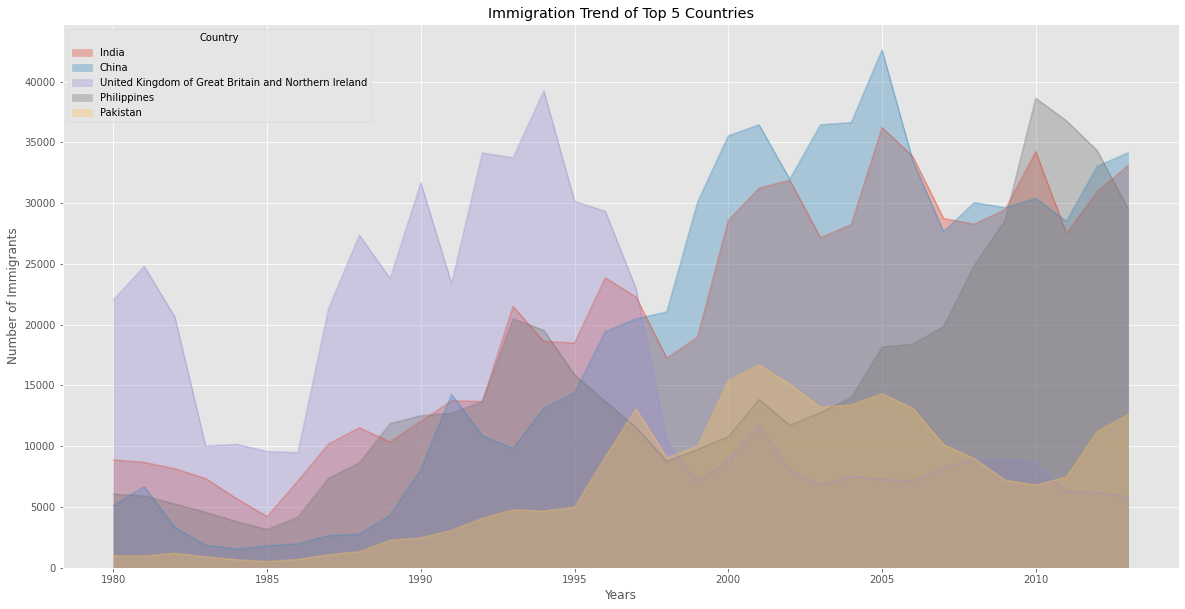

In [42]:
df_top5.plot(kind='area', 
             alpha=0.35, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Histogram
A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin.


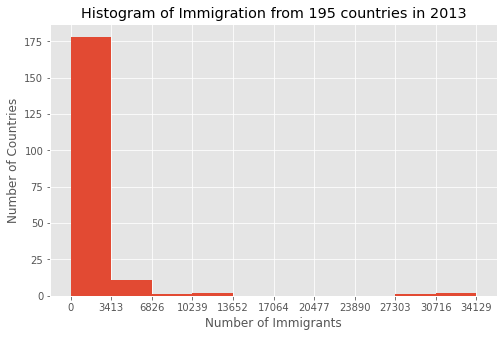

In [43]:
# Immigrants from all countries for 2013 year
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants')

plt.show()

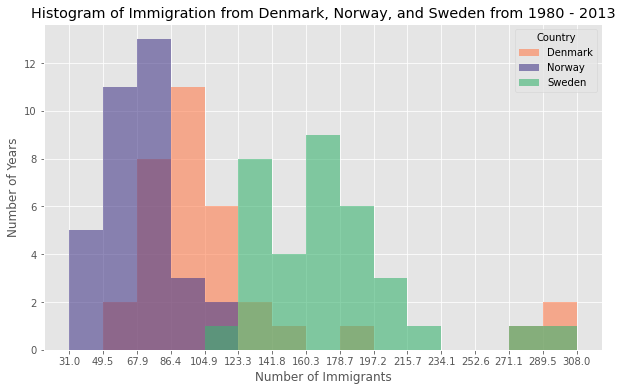

In [44]:
# Immigrants from 3 countries for all year
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar chart
A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable.

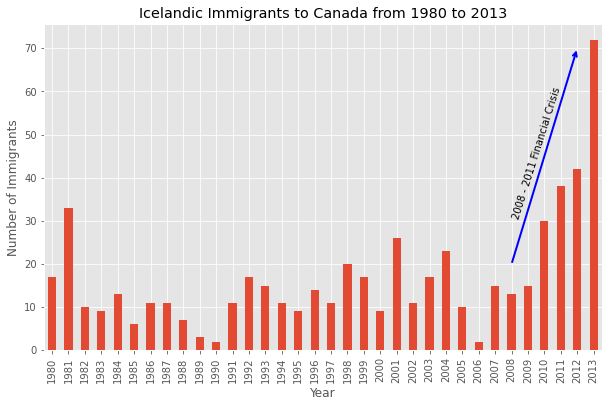

In [46]:
# Compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.
df_iceland = df_can.loc['Iceland', years]

df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

## Pie chart
A pie chart is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices.

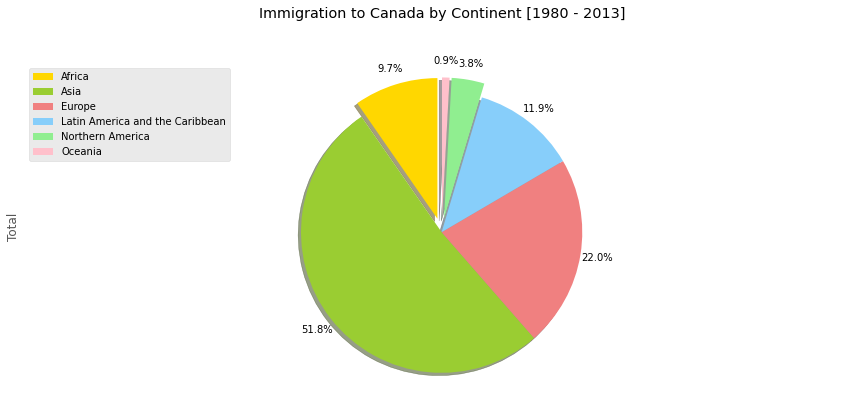

In [48]:
df_continents = df_can.groupby('Continent', axis=0).sum()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

## Box Plot
A boxplot is a way of statistically representing the distribution of given data through 5 main dimensions.

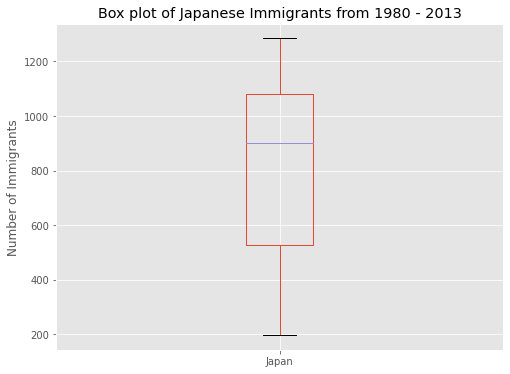

In [49]:
# For one country: Japan.
df_japan = df_can.loc[['Japan'], years].transpose()

df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

1. Minimum number of immigrants is around 200 (min).
2. Maximum number is around 1300 (max).
3. Median number of immigrants is around 900 (median).
4. 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
5. 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

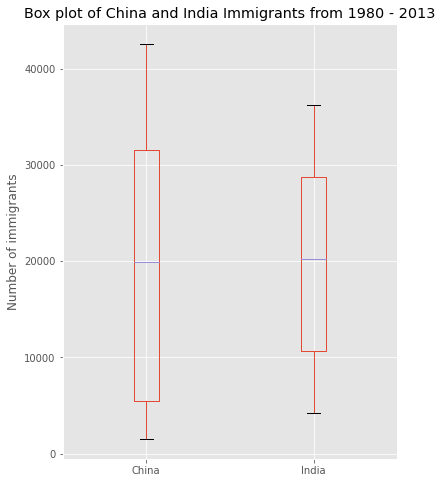

In [50]:
# For two countries: Chine, India
df_CI = df_can.loc[['China', 'India'], years].transpose()

df_CI.plot(kind='box', figsize=(6, 8))

plt.title('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of immigrants')
plt.show()

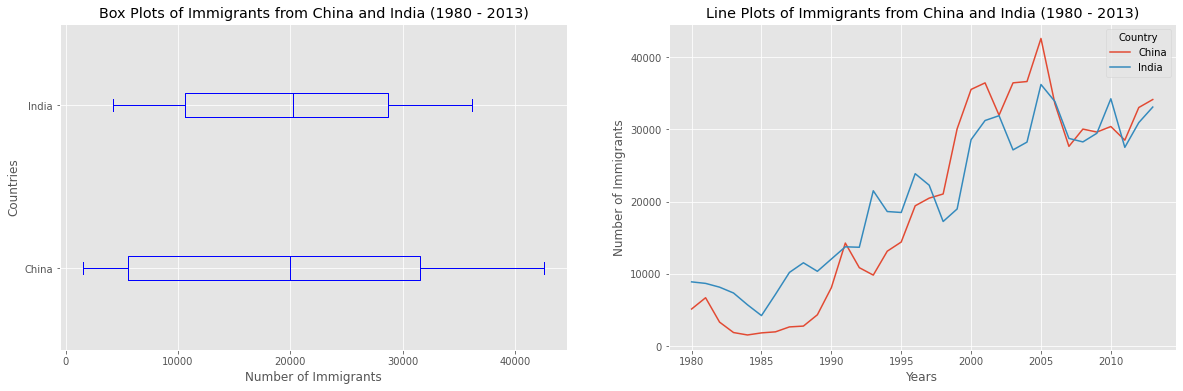

In [51]:
# Subplots
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## Scatter Plot
A scatter plot is a type of plot that displays values pertaining(относящийся к) to typically two variables against each other. 
Usually it is a dependent variable to be plotted against an independent variable in order to determine if any correlation between the two variables exists.

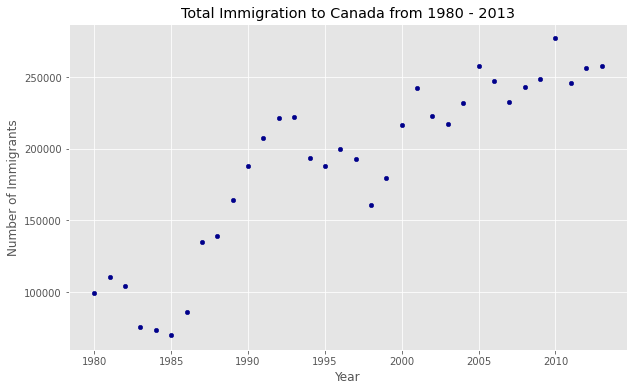

In [60]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total']

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()